# **Prerequisites**
will need to have
1. A fundamental knowledge of Python programming language.
2. A fundamental knowledge in Machine Learning.
3. Jupyter Notebook/ Jupyter Lab/ Google Colab.

# **Importing Libraries**

In [1]:
!pip install yfinance 
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 7.0 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [112]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [192]:
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
import seaborn as sns
import math
from math import sqrt


# Scaling libraries
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, MaxAbsScaler, RobustScaler
from sklearn.preprocessing import QuantileTransformer, Binarizer

# Machine learning libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostRegressor, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# evaluation libraries
import sklearn.metrics as metrics


import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVR 

import yfinance as yf
yf.pdr_override()

from sklearn.model_selection import train_test_split


#**Load Data**

In [114]:
ticker = ""

# Input details to check

# Input Start Date
def start_date():
    date_entry = input('Enter a starting date in MM/DD/YYYY format: ')
    start = dt.datetime.strptime(date_entry,'%m/%d/%Y')
    start = start.strftime('%Y-%m-%d')
    return start

# Input End Date
def end_date():
    date_entry = input('Enter a ending date in MM/DD/YYYY format: ')
    end = dt.datetime.strptime(date_entry,'%m/%d/%Y')
    end = end.strftime('%Y-%m-%d')
    return end

# Input Symbols
def input_symbol():
    symbol = input("Enter symbol: ").upper()
    return symbol

# load Dataset
def load_data():

    start = start_date()
    end = end_date()
    ticker = input_symbol()

    
    data = web.DataReader(ticker, 'yahoo', start, end)
    #data = yf.download(ticker, start, end)
    
    return data

In [115]:
# Stock data 
StockData = load_data()

#Show data
StockData

Enter a starting date in MM/DD/YYYY format: 01/01/2011
Enter a ending date in MM/DD/YYYY format: 01/01/2022
Enter symbol: amzn


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,9.300000,9.060500,9.068500,9.211000,106628000,9.211000
2011-01-04,9.385000,9.189000,9.307500,9.250500,100636000,9.250500
2011-01-05,9.372500,9.203500,9.205000,9.371000,68376000,9.371000
2011-01-06,9.370500,9.262500,9.325000,9.293000,63594000,9.293000
2011-01-07,9.422500,9.187000,9.394000,9.274500,104434000,9.274500
...,...,...,...,...,...,...
2021-12-27,172.942993,169.215500,171.037003,169.669495,58688000,169.669495
2021-12-28,172.175995,169.135498,170.182495,170.660995,54638000,170.660995
2021-12-29,171.212006,168.600494,170.839996,169.201004,35754000,169.201004


# **Exploring Dataset**

In [116]:
StockData.shape

(2769, 6)

In [117]:
# Dataset description
print(StockData.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2769 entries, 2011-01-03 to 2021-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2769 non-null   float64
 1   Low        2769 non-null   float64
 2   Open       2769 non-null   float64
 3   Close      2769 non-null   float64
 4   Volume     2769 non-null   int64  
 5   Adj Close  2769 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 151.4 KB
None


Our dataset consist 6 columns where 5 are floats and one is an integer, all columns are in a good state hence there is no need to replace or remove rows  

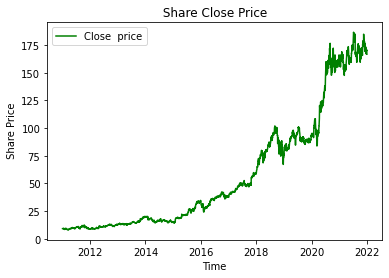

In [118]:
# viaualise "Close" attribute to see market trend
closeplot = StockData['Close'].copy()

plt.plot(closeplot, color="green", label=f"Close {ticker} price")
plt.title(f"{ticker} Share Close Price ")
plt.xlabel('Time')
plt.ylabel(f'{ticker} Share Price')
plt.legend()
plt.show()

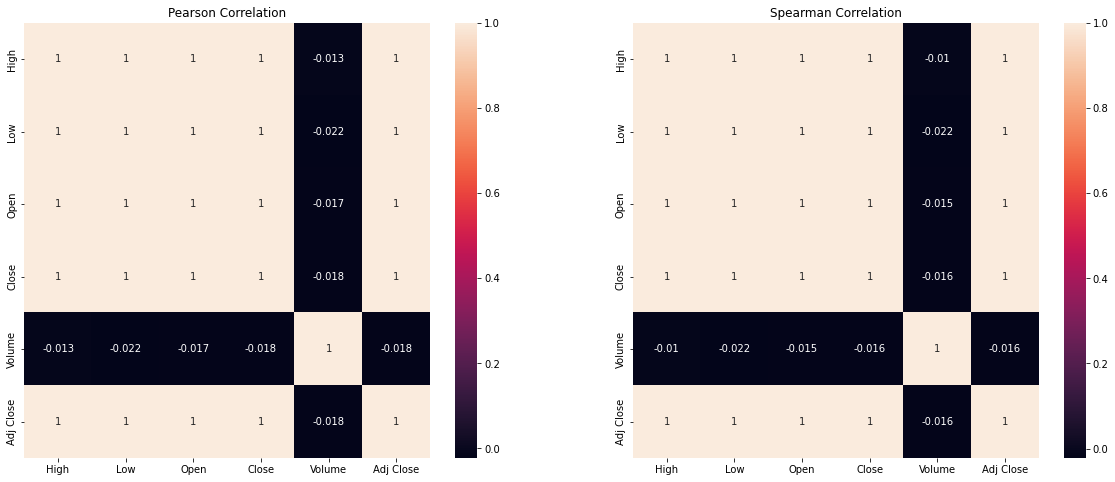

In [119]:
# Visualising the data with Pearson's and Spearman's Correlation Coefficent
# this was done to find columns (independent variables) in the dataset which 
# affect the expenditure (dependent variable)
plt.figure(figsize=(20, 8)) 
plt.subplot(1, 2, 1)
corr = StockData.corr(method = 'pearson')
sns.heatmap(corr, annot = True)
plt.title("Pearson Correlation")

plt.subplot(1, 2, 2)
corr = StockData.corr(method = 'spearman')
sns.heatmap(corr, annot = True)
plt.title("Spearman Correlation")
plt.show()

# **Preparing Data**

In this, we select the set of attributes that directly affect the dependent variables (Close) in our dataset:

In [120]:
features =  ['High', 'Low', 'Open','Adj Close']


Then split the data between y(dependent) and X(independent) variables:

In [121]:
y = StockData.Close
x = StockData[features]

In [122]:
print(y)

Date
2011-01-03      9.211000
2011-01-04      9.250500
2011-01-05      9.371000
2011-01-06      9.293000
2011-01-07      9.274500
                 ...    
2021-12-27    169.669495
2021-12-28    170.660995
2021-12-29    169.201004
2021-12-30    168.644501
2021-12-31    166.716995
Name: Close, Length: 2769, dtype: float64


After that, we  split our dataset into the training set and testing set in the ratios of 80:20:

In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.7, random_state=1)

In [124]:
# Function to split dataset into training and testing datasets
def split(dataset):
  # In this, we select the set of attributes that directly affect the dependent variables (Close) in our dataset:
  features =  ['High', 'Low', 'Open','Adj Close']

  # Then split the data between y(dependent) and X(independent) variables:
  y = dataset['Close']
  x = dataset[features]

  # After that, we split our dataset into the training set and testing set in the ratios of 80:20:
  X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.7, random_state=1)
  return X_train, X_test, Y_train, Y_test

# **Fitting the Models (Before Scaling)**

### **SVM**

In [125]:
classifier = svm.LinearSVR()
# fitting model
classifier.fit(X_train,Y_train)
# predict
Y_predict = classifier.predict(X_test)
# check accuracy
accuracy_b4 = classifier.score(X_test, Y_test)

In [126]:
print('Accuracy of SVM before Scaling') 
print(accuracy_b4)

Accuracy of SVM before Scaling
0.9999999417807311


In [172]:
# check R2
r2_b4 = r2_score(Y_test, Y_predict)
print('R2 of SVM before Scaling') 
print(r2_b4)

R2 of SVM before Scaling
0.9999999417807311


In [183]:
# Check RMSE
rmse_b4 = mean_squared_error(Y_test, Y_predict, squared=False)
print('RMSE of SVM before Scaling') 
print(rmse_b4)

RMSE of SVM before Scaling
0.01260930226452146


In [193]:
# Check MAPE
mape_b4 = mean_absolute_percentage_error(Y_test, Y_predict)
print('MAPE of SVM before Scaling') 
print(mape_b4)

MAPE of SVM before Scaling
0.00012099855746256524


### **linear Regression**

In [203]:
classifier2 = LinearRegression()
# fitting model
classifier2.fit(X_train,Y_train)
# predict
Y_predict_lin = classifier2.predict(X_test)
# check accuracy
accuracy_b4_lin = classifier2.score(X_test, Y_test)

In [204]:
# check accuracy
print('Accuracy of Linear Regression before Scaling \n') 
print(accuracy_b4_lin)

# check R2
r2_b4_lin = r2_score(Y_test, Y_predict_lin)
print('R2 of Linear Regression before Scaling \n') 
print(r2_b4)

# Check RMSE
rmse_b4_lin = mean_squared_error(Y_test, Y_predict_lin, squared=False)
print('RMSE of Linear Regression before Scaling \n') 
print(rmse_b4_lin)

# Check MAPE
mape_b4_lin = mean_absolute_percentage_error(Y_test, Y_predict_lin)
print('MAPE of Linear Regression before Scaling \n') 
print(mape_b4_lin)

Accuracy of Linear Regression before Scaling 

1.0
R2 of Linear Regression before Scaling 

0.9999999417807311
RMSE of Linear Regression before Scaling 

7.032334375143089e-15
MAPE of Linear Regression before Scaling 

3.580171107965614e-17


#**Data Scaling**

#### **Standardizer**

In [129]:
def standadizer(data):
    workdata = data.copy()

    col = []
    for col_name in workdata.columns:
      if workdata[col_name].dtype=='object':
        pass
      else: 
          col.append(col_name)
    for i in col:
      standardScaling = StandardScaler().fit(workdata[[i]])
      workdata[i] = standardScaling.transform(workdata[[i]])
    return workdata
  

    

In [130]:
standard_Stock_Data = standadizer(StockData)
standard_Stock_Data.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,-0.921898,-0.923320,-0.924818,-0.922432,0.485254,-0.922432
2011-01-04,-0.920294,-0.920840,-0.920261,-0.921678,0.355534,-0.921678
2011-01-05,-0.920530,-0.920560,-0.922215,-0.919379,-0.342859,-0.919379
2011-01-06,-0.920568,-0.919422,-0.919927,-0.920867,-0.446384,-0.920867
2011-01-07,-0.919587,-0.920879,-0.918612,-0.921220,0.437756,-0.921220
2011-01-10,-0.922567,-0.922065,-0.921319,-0.921993,-0.361433,-0.921993
2011-01-11,-0.921898,-0.921390,-0.920957,-0.922318,-0.604637,-0.922318
2011-01-12,-0.922483,-0.921303,-0.921014,-0.922566,-0.663132,-0.922566
2011-01-13,-0.921473,-0.921101,-0.922692,-0.921182,-0.365287,-0.921182


#### **MinMax Scaling / Normalizing**

In [131]:
def minMax(data):
    workdata1 = data.copy()
    col = []
    for col_name in workdata1.columns:
      if workdata1[col_name].dtype=='object':
        pass
      else: 
          col.append(col_name)
    for i in col:
      minMaxScaling = MinMaxScaler(feature_range=(0,1)).fit(workdata1[[i]])
      workdata1[i] = minMaxScaling.transform(workdata1[[i]])
    return workdata1

In [134]:
minMax_Stock_Data = minMax(StockData)
minMax_Stock_Data.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,0.006222,0.005831,0.005632,0.006512,0.191378,0.006512
2011-01-04,0.006693,0.006558,0.006967,0.006733,0.178494,0.006733
2011-01-05,0.006624,0.006640,0.006394,0.007408,0.109126,0.007408
2011-01-06,0.006613,0.006974,0.007064,0.006971,0.098844,0.006971
2011-01-07,0.006901,0.006547,0.007449,0.006868,0.186661,0.006868
2011-01-10,0.006026,0.006199,0.006657,0.006641,0.107281,0.006641
2011-01-11,0.006222,0.006397,0.006763,0.006545,0.083125,0.006545
2011-01-12,0.006051,0.006422,0.006746,0.006473,0.077315,0.006473
2011-01-13,0.006347,0.006482,0.006255,0.006879,0.106898,0.006879


#### **Binarizer**

In [136]:
def binirized(data):
    workdata2 = data.copy()
    col = []
    for col_name in workdata2.columns:
      if workdata2[col_name].dtype=='object':
        pass
      else: 
          col.append(col_name)
    for i in col:
      binscaling = Binarizer(threshold = 0.0).fit(workdata2[[i]])
      workdata2[i] = binscaling.transform(workdata2[[i]])
    return workdata2

In [139]:
binirized_Stock_Data = binirized(StockData)
binirized_Stock_Data.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,1.0,1.0,1.0,1.0,1,1.0
2011-01-04,1.0,1.0,1.0,1.0,1,1.0
2011-01-05,1.0,1.0,1.0,1.0,1,1.0
2011-01-06,1.0,1.0,1.0,1.0,1,1.0
2011-01-07,1.0,1.0,1.0,1.0,1,1.0
2011-01-10,1.0,1.0,1.0,1.0,1,1.0
2011-01-11,1.0,1.0,1.0,1.0,1,1.0
2011-01-12,1.0,1.0,1.0,1.0,1,1.0
2011-01-13,1.0,1.0,1.0,1.0,1,1.0


#### **Quantile Scaling**

In [140]:
def quantile_scale(data):
    workdata3 = data.copy()
    col = []
    for col_name in workdata3.columns:
      if workdata3[col_name].dtype=='object':
        pass
      else: 
          col.append(col_name)
    for i in col:
      quantScaling = QuantileTransformer(n_quantiles=10, random_state=0).fit(workdata3[[i]])
      workdata3[i] = quantScaling.transform(workdata3[[i]])
    return workdata3

In [143]:
Quant_Stock_Data = quantile_scale(StockData)
Quant_Stock_Data.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,0.044898,0.042911,0.040324,0.045970,0.791512,0.045970
2011-01-04,0.048296,0.048259,0.049875,0.047531,0.759351,0.047531
2011-01-05,0.047796,0.048863,0.045779,0.052297,0.448151,0.052297
2011-01-06,0.047716,0.051318,0.050574,0.049212,0.380915,0.049212
2011-01-07,0.049795,0.048176,0.053332,0.048481,0.782786,0.048481
2011-01-10,0.043478,0.045616,0.047657,0.046879,0.436505,0.046879
2011-01-11,0.044898,0.047073,0.048416,0.046207,0.269383,0.046207
2011-01-12,0.043658,0.047260,0.048297,0.045693,0.225653,0.045693
2011-01-13,0.045797,0.047697,0.044780,0.048560,0.433983,0.048560


#### **MaxAbs Scaling**

In [144]:
def maxAbs_scale(data):
    workdata4 = data.copy()
    col = []
    for col_name in workdata4.columns:
      if workdata4[col_name].dtype=='object':
        pass
      else: 
          col.append(col_name)
    for i in col:
      maxAbsScaling = MaxAbsScaler().fit(workdata4[[i]])
      workdata4[i] = maxAbsScaling.transform(workdata4[[i]])
    return workdata4

In [147]:
maxAbs_Stock_Data = maxAbs_scale(StockData)
maxAbs_Stock_Data.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,0.049297,0.049018,0.048443,0.049370,0.220906,0.049370
2011-01-04,0.049747,0.049713,0.049720,0.049582,0.208493,0.049582
2011-01-05,0.049681,0.049792,0.049172,0.050228,0.141658,0.050228
2011-01-06,0.049670,0.050111,0.049813,0.049810,0.131751,0.049810
2011-01-07,0.049946,0.049703,0.050182,0.049710,0.216361,0.049710
2011-01-10,0.049108,0.049370,0.049423,0.049493,0.139880,0.049493
2011-01-11,0.049297,0.049559,0.049525,0.049402,0.116606,0.049402
2011-01-12,0.049132,0.049584,0.049509,0.049333,0.111008,0.049333
2011-01-13,0.049416,0.049640,0.049038,0.049721,0.139512,0.049721


#### **Robust Scaling**

In [148]:
def robust_scale(data):
    workdata5 = data.copy()
    col = []
    for col_name in workdata5.columns:
      if workdata5[col_name].dtype=='object':
        pass
      else: 
          col.append(col_name)
    for i in col:
      robustScaling = RobustScaler().fit(workdata5[[i]])
      workdata5[i] = robustScaling.transform(workdata5[[i]])
    return workdata5

In [158]:
robust_Stock_Data = robust_scale(StockData)
robust_Stock_Data.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,-0.364722,-0.367270,-0.366510,-0.365845,0.776161,-0.365845
2011-01-04,-0.363585,-0.365523,-0.363297,-0.365314,0.639495,-0.365314
2011-01-05,-0.363752,-0.365326,-0.364675,-0.363693,-0.096296,-0.363693
2011-01-06,-0.363779,-0.364524,-0.363062,-0.364742,-0.205364,-0.364742
2011-01-07,-0.363084,-0.365550,-0.362135,-0.364991,0.726120,-0.364991
2011-01-10,-0.365197,-0.366386,-0.364043,-0.365536,-0.115865,-0.365536
2011-01-11,-0.364722,-0.365911,-0.363788,-0.365764,-0.372092,-0.365764
2011-01-12,-0.365136,-0.365850,-0.363828,-0.365939,-0.433720,-0.365939
2011-01-13,-0.364421,-0.365707,-0.365011,-0.364964,-0.119925,-0.364964


#### **Normalizer**

In [160]:
def normalize(data):
    workdata6 = data.copy()
    col = []
    for col_name in workdata6.columns:
      if workdata6[col_name].dtype=='object':
        pass
      else: 
          col.append(col_name)
    for i in col:
      normal = Normalizer().fit(workdata6[[i]])
      workdata6[i] = normal.transform(workdata6[[i]])
    return workdata6

In [161]:
normalized_Stock_Data = normalize(StockData)
normalized_Stock_Data.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,1.0,1.0,1.0,1.0,1.0,1.0
2011-01-04,1.0,1.0,1.0,1.0,1.0,1.0
2011-01-05,1.0,1.0,1.0,1.0,1.0,1.0
2011-01-06,1.0,1.0,1.0,1.0,1.0,1.0
2011-01-07,1.0,1.0,1.0,1.0,1.0,1.0
2011-01-10,1.0,1.0,1.0,1.0,1.0,1.0
2011-01-11,1.0,1.0,1.0,1.0,1.0,1.0
2011-01-12,1.0,1.0,1.0,1.0,1.0,1.0
2011-01-13,1.0,1.0,1.0,1.0,1.0,1.0


In [162]:
StockData

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,9.300000,9.060500,9.068500,9.211000,106628000,9.211000
2011-01-04,9.385000,9.189000,9.307500,9.250500,100636000,9.250500
2011-01-05,9.372500,9.203500,9.205000,9.371000,68376000,9.371000
2011-01-06,9.370500,9.262500,9.325000,9.293000,63594000,9.293000
2011-01-07,9.422500,9.187000,9.394000,9.274500,104434000,9.274500
...,...,...,...,...,...,...
2021-12-27,172.942993,169.215500,171.037003,169.669495,58688000,169.669495
2021-12-28,172.175995,169.135498,170.182495,170.660995,54638000,170.660995
2021-12-29,171.212006,168.600494,170.839996,169.201004,35754000,169.201004


# **ML models and fitting**

### **SVM**

In [194]:
def scaled_svm():
  # split Standardized dataset
  X_train1, X_test1, Y_train1, Y_test1 = split(standard_Stock_Data)

  # split MinMax dataset
  X_train2, X_test2, Y_train2, Y_test2, = split(minMax_Stock_Data)

  # split Binirized dataset
  X_train3, X_test3, Y_train3, Y_test3,= split(binirized_Stock_Data)

  # split Quant Scale dataset
  X_train4, X_test4, Y_train4, Y_test4, = split(Quant_Stock_Data)

  # split Robust Scale dataset
  X_train5, X_test5, Y_train5, Y_test5 = split(robust_Stock_Data)

  # split Normalized dataset
  X_train6, X_test6, Y_train6, Y_test6 = split(normalized_Stock_Data)

  # split maxAbs dataset
  X_train7, X_test7, Y_train7, Y_test7= split(maxAbs_Stock_Data)

  #initiate regressors 
  stan_classifier = svm.LinearSVR()
  minMax_classifier = svm.LinearSVR()
  bin_classifier = svm.LinearSVR()
  quant_classifier = svm.LinearSVR()
  rob_classifier = svm.LinearSVR()
  nom_classifier = svm.LinearSVR()
  maxabs_classifier = svm.LinearSVR()

  # fitting models
  stan_classifier.fit(X_train1,Y_train1)
  minMax_classifier.fit(X_train2,Y_train2)
  bin_classifier.fit(X_train3,Y_train3)
  quant_classifier.fit(X_train4,Y_train4)
  rob_classifier.fit(X_train5,Y_train5)
  nom_classifier.fit(X_train6,Y_train6)
  maxabs_classifier.fit(X_train7,Y_train7)

  # predict
  Y_predict1 = stan_classifier.predict(X_test1)
  Y_predict2 = minMax_classifier.predict(X_test2)
  Y_predict3 = bin_classifier.predict(X_test3)
  Y_predict4 = quant_classifier.predict(X_test4)
  Y_predict5 = rob_classifier.predict(X_test5)
  Y_predict6 = nom_classifier.predict(X_test6)
  Y_predict7 = maxabs_classifier.predict(X_test7)
  # check accuracy
  accuracy_stan = stan_classifier.score(X_test1, Y_test1)
  accuracy_minmax = minMax_classifier.score(X_test2, Y_test2)
  accuracy_bin = bin_classifier.score(X_test3, Y_test3)
  accuracy_quant = quant_classifier.score(X_test4, Y_test4)
  accuracy_rob = rob_classifier.score(X_test5, Y_test5)
  accuracy_nom = nom_classifier.score(X_test6, Y_test6)
  accuracy_maxabs = maxabs_classifier.score(X_test7, Y_test7)

  print("ACCURACY SVM")
  print("SVR Accuracy before scaling :", accuracy_b4, 
        "\n SVR Accuracy after Standardization :", accuracy_stan, 
        "\n SVR Accuracy after MinMax Scaling :", accuracy_minmax, 
        "\n SVR Accuracy after Binirization :", accuracy_bin,
        "\n SVR Accuracy after Quantile Scaling :", accuracy_quant,
        "\n SVR Accuracy after Robust Scaling :", accuracy_rob,
        "\n SVR Accuracy after Normalization :", accuracy_nom,
        "\n SVR Accuracy after MaxAbs Scaling :", accuracy_maxabs, "\n")
  
  
  # check R2 score:
  r2_1 = r2_score(Y_test1, Y_predict1)
  r2_2 = r2_score(Y_test2, Y_predict2)
  r2_3 = r2_score(Y_test3, Y_predict3)
  r2_4 = r2_score(Y_test4, Y_predict4)
  r2_5 = r2_score(Y_test5, Y_predict5)
  r2_6 = r2_score(Y_test6, Y_predict6)
  r2_7 = r2_score(Y_test7, Y_predict7)
  print("R2 SVM")
  print("SVR R2 before scaling :", r2_b4, 
        "\n SVR R2 after Standardization :", r2_1, 
        "\n SVR R2 after MinMax Scaling :", r2_2, 
        "\n SVR R2 after Binirization :", r2_3,
        "\n SVR R2 after Quantile Scaling :", r2_4,
        "\n SVR R2 after Robust Scaling :", r2_5,
        "\n SVR R2 after Normalization :", r2_6,
        "\n SVR R2 after MaxAbs Scaling :", r2_7, "\n")
  
  # Check Root Mean Squared Error
  
  rmse_1 = mean_squared_error(Y_test1, Y_predict1, squared=False)
  rmse_2 = mean_squared_error(Y_test2, Y_predict2, squared=False)
  rmse_3 = mean_squared_error(Y_test3, Y_predict3, squared=False)
  rmse_4 = mean_squared_error(Y_test4, Y_predict4, squared=False)
  rmse_5 = mean_squared_error(Y_test5, Y_predict5, squared=False)
  rmse_6 = mean_squared_error(Y_test6, Y_predict6, squared=False)
  rmse_7 = mean_squared_error(Y_test7, Y_predict7, squared=False)
  print("RMSE SVM")
  print("SVR RMSE before scaling :", rmse_b4, 
        "\n SVR RMSE after Standardization :", rmse_1, 
        "\n SVR RMSE after MinMax Scaling :", rmse_2, 
        "\n SVR RMSE after Binirization :", rmse_3,
        "\n SVR RMSE after Quantile Scaling :", rmse_4,
        "\n SVR RMSE after Robust Scaling :", rmse_5,
        "\n SVR RMSE after Normalization :", rmse_6,
        "\n SVR RMSE after MaxAbs Scaling :", rmse_7, "\n")
  
  # check Mean Absolute Percentage Error 
  mape_1 = mean_absolute_percentage_error(Y_test1, Y_predict1)
  mape_2 = mean_absolute_percentage_error(Y_test2, Y_predict2)
  mape_3 = mean_absolute_percentage_error(Y_test3, Y_predict3)
  mape_4 = mean_absolute_percentage_error(Y_test4, Y_predict4)
  mape_5 = mean_absolute_percentage_error(Y_test5, Y_predict5)
  mape_6 = mean_absolute_percentage_error(Y_test6, Y_predict6)
  mape_7 = mean_absolute_percentage_error(Y_test7, Y_predict7)
  print("MAPE SVM")
  print("SVR MAPE before scaling :", mape_b4, 
        "\n SVR MAPE after Standardization :", mape_1, 
        "\n SVR MAPE after MinMax Scaling :", mape_2, 
        "\n SVR MAPE after Binirization :", mape_3,
        "\n SVR MAPE after Quantile Scaling :", mape_4,
        "\n SVR MAPE after Robust Scaling :", mape_5,
        "\n SVR MAPE after Normalization :", mape_6,
        "\n SVR MAPE after MaxAbs Scaling :", mape_7, "\n")


  return 
  
  


In [195]:
scaled_svm()

ACCURACY SVM
SVR Accuracy before scaling : 0.9999999417807311 
 SVR Accuracy after Standardization : 0.9999999758126394 
 SVR Accuracy after MinMax Scaling : 0.9999973269697086 
 SVR Accuracy after Binirization : 1.0 
 SVR Accuracy after Quantile Scaling : 0.9999985025160025 
 SVR Accuracy after Robust Scaling : 0.9999997824002838 
 SVR Accuracy after Normalization : 1.0 
 SVR Accuracy after MaxAbs Scaling : 0.9999968359517241 

R2 SVM
SVR R2 before scaling : 0.9999999417807311 
 SVR R2 after Standardization : 0.9999999758126394 
 SVR R2 after MinMax Scaling : 0.9999973269697086 
 SVR R2 after Binirization : 1.0 
 SVR R2 after Quantile Scaling : 0.9999985025160025 
 SVR R2 after Robust Scaling : 0.9999997824002838 
 SVR R2 after Normalization : 1.0 
 SVR R2 after MaxAbs Scaling : 0.9999968359517241 

RMSE SVM
SVR RMSE before scaling : 0.01260930226452146 
 SVR RMSE after Standardization : 0.00015508796308448276 
 SVR RMSE after MinMax Scaling : 0.0004785947049075082 
 SVR RMSE after Bi

### **Linear Regression**

In [207]:
#LinearRegression(random_state=0)
def scaled_linR():
  # split Standardized dataset
  X_train1, X_test1, Y_train1, Y_test1 = split(standard_Stock_Data)

  # split MinMax dataset
  X_train2, X_test2, Y_train2, Y_test2, = split(minMax_Stock_Data)

  # split Binirized dataset
  X_train3, X_test3, Y_train3, Y_test3,= split(binirized_Stock_Data)

  # split Quant Scale dataset
  X_train4, X_test4, Y_train4, Y_test4, = split(Quant_Stock_Data)

  # split Robust Scale dataset
  X_train5, X_test5, Y_train5, Y_test5 = split(robust_Stock_Data)

  # split Normalized dataset
  X_train6, X_test6, Y_train6, Y_test6 = split(normalized_Stock_Data)

  # split maxAbs dataset
  X_train7, X_test7, Y_train7, Y_test7= split(maxAbs_Stock_Data)

  #initiate regressors 
  stan_classifier = LinearRegression()
  minMax_classifier = LinearRegression()
  bin_classifier = LinearRegression()
  quant_classifier = LinearRegression()
  rob_classifier = LinearRegression()
  nom_classifier = LinearRegression()
  maxabs_classifier = LinearRegression()

  # fitting models
  stan_classifier.fit(X_train1,Y_train1)
  minMax_classifier.fit(X_train2,Y_train2)
  bin_classifier.fit(X_train3,Y_train3)
  quant_classifier.fit(X_train4,Y_train4)
  rob_classifier.fit(X_train5,Y_train5)
  nom_classifier.fit(X_train6,Y_train6)
  maxabs_classifier.fit(X_train7,Y_train7)

  # predict
  Y_predict1 = stan_classifier.predict(X_test1)
  Y_predict2 = minMax_classifier.predict(X_test2)
  Y_predict3 = bin_classifier.predict(X_test3)
  Y_predict4 = quant_classifier.predict(X_test4)
  Y_predict5 = rob_classifier.predict(X_test5)
  Y_predict6 = nom_classifier.predict(X_test6)
  Y_predict7 = maxabs_classifier.predict(X_test7)

  # check accuracy
  accuracy_stan = stan_classifier.score(X_test1, Y_test1)
  accuracy_minmax = minMax_classifier.score(X_test2, Y_test2)
  accuracy_bin = bin_classifier.score(X_test3, Y_test3)
  accuracy_quant = quant_classifier.score(X_test4, Y_test4)
  accuracy_rob = rob_classifier.score(X_test5, Y_test5)
  accuracy_nom = nom_classifier.score(X_test6, Y_test6)
  accuracy_maxabs = maxabs_classifier.score(X_test7, Y_test7)

  print("ACCURACY LinearRegression")
  print("LinearRegression Accuracy before scaling :", accuracy_b4_lin, 
        "\n LinearRegression Accuracy after Standardization :", accuracy_stan, 
        "\n LinearRegression Accuracy after MinMax Scaling :", accuracy_minmax, 
        "\n LinearRegression Accuracy after Binirization :", accuracy_bin,
        "\n LinearRegression Accuracy after Quantile Scaling :", accuracy_quant,
        "\n LinearRegression Accuracy after Robust Scaling :", accuracy_rob,
        "\n LinearRegression Accuracy after Normalization :", accuracy_nom,
        "\n LinearRegression Accuracy after MaxAbs Scaling :", accuracy_maxabs, "\n")
  
  
  # check R2 score:
  r2_1 = r2_score(Y_test1, Y_predict1)
  r2_2 = r2_score(Y_test2, Y_predict2)
  r2_3 = r2_score(Y_test3, Y_predict3)
  r2_4 = r2_score(Y_test4, Y_predict4)
  r2_5 = r2_score(Y_test5, Y_predict5)
  r2_6 = r2_score(Y_test6, Y_predict6)
  r2_7 = r2_score(Y_test7, Y_predict7)
  print("R2 LinearRegression")
  print("LinearRegression R2 before scaling :", r2_b4_lin, 
        "\n LinearRegression R2 after Standardization :", r2_1, 
        "\n LinearRegression R2 after MinMax Scaling :", r2_2, 
        "\n LinearRegression R2 after Binirization :", r2_3,
        "\n LinearRegression R2 after Quantile Scaling :", r2_4,
        "\n LinearRegression R2 after Robust Scaling :", r2_5,
        "\n LinearRegression R2 after Normalization :", r2_6,
        "\n LinearRegression R2 after MaxAbs Scaling :", r2_7, "\n")
  
  # Check Root Mean Squared Error
  
  rmse_1 = mean_squared_error(Y_test1, Y_predict1, squared=False)
  rmse_2 = mean_squared_error(Y_test2, Y_predict2, squared=False)
  rmse_3 = mean_squared_error(Y_test3, Y_predict3, squared=False)
  rmse_4 = mean_squared_error(Y_test4, Y_predict4, squared=False)
  rmse_5 = mean_squared_error(Y_test5, Y_predict5, squared=False)
  rmse_6 = mean_squared_error(Y_test6, Y_predict6, squared=False)
  rmse_7 = mean_squared_error(Y_test7, Y_predict7, squared=False)
  print("RMSE LinearRegression")
  print("LinearRegression RMSE before scaling :", rmse_b4_lin, 
        "\n LinearRegression RMSE after Standardization :", rmse_1, 
        "\n LinearRegression RMSE after MinMax Scaling :", rmse_2, 
        "\n LinearRegression RMSE after Binirization :", rmse_3,
        "\n LinearRegression RMSE after Quantile Scaling :", rmse_4,
        "\n LinearRegression RMSE after Robust Scaling :", rmse_5,
        "\n LinearRegression RMSE after Normalization :", rmse_6,
        "\n LinearRegression RMSE after MaxAbs Scaling :", rmse_7, "\n")
  
  # check Mean Absolute Percentage Error 
  mape_1 = mean_absolute_percentage_error(Y_test1, Y_predict1)
  mape_2 = mean_absolute_percentage_error(Y_test2, Y_predict2)
  mape_3 = mean_absolute_percentage_error(Y_test3, Y_predict3)
  mape_4 = mean_absolute_percentage_error(Y_test4, Y_predict4)
  mape_5 = mean_absolute_percentage_error(Y_test5, Y_predict5)
  mape_6 = mean_absolute_percentage_error(Y_test6, Y_predict6)
  mape_7 = mean_absolute_percentage_error(Y_test7, Y_predict7)
  print("MAPE LinearRegression")
  print("LinearRegression MAPE before scaling :", mape_b4_lin, 
        "\n LinearRegression MAPE after Standardization :", mape_1, 
        "\n LinearRegression MAPE after MinMax Scaling :", mape_2, 
        "\n LinearRegression MAPE after Binirization :", mape_3,
        "\n LinearRegression MAPE after Quantile Scaling :", mape_4,
        "\n LinearRegression MAPE after Robust Scaling :", mape_5,
        "\n LinearRegression MAPE after Normalization :", mape_6,
        "\n LinearRegression MAPE after MaxAbs Scaling :", mape_7, "\n")


  return 

In [208]:
scaled_linR()

ACCURACY LinearRegression
LinearRegression Accuracy before scaling : 1.0 
 LinearRegression Accuracy after Standardization : 1.0 
 LinearRegression Accuracy after MinMax Scaling : 1.0 
 LinearRegression Accuracy after Binirization : 1.0 
 LinearRegression Accuracy after Quantile Scaling : 1.0 
 LinearRegression Accuracy after Robust Scaling : 1.0 
 LinearRegression Accuracy after Normalization : 1.0 
 LinearRegression Accuracy after MaxAbs Scaling : 1.0 

R2 LinearRegression
LinearRegression R2 before scaling : 1.0 
 LinearRegression R2 after Standardization : 1.0 
 LinearRegression R2 after MinMax Scaling : 1.0 
 LinearRegression R2 after Binirization : 1.0 
 LinearRegression R2 after Quantile Scaling : 1.0 
 LinearRegression R2 after Robust Scaling : 1.0 
 LinearRegression R2 after Normalization : 1.0 
 LinearRegression R2 after MaxAbs Scaling : 1.0 

RMSE LinearRegression
LinearRegression RMSE before scaling : 7.032334375143089e-15 
 LinearRegression RMSE after Standardization : 1.6

### **LSTM**

In [224]:
def reshaped_split(dataset):

  # In this, we select the set of attributes that directly affect the dependent variables (Close) in our dataset:
  features =  ['High', 'Low', 'Open','Adj Close']

  # Then split the data between y(dependent) and X(independent) variables:
  y = dataset['Close']
  x = dataset[features]

  
  # After that, we split our dataset into the training set and testing set in the ratios of 80:20:
  X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.7, random_state=1)

  # reshape train and test data for LSTM (LSTM expects data to be threee dimentional)
  # convert to numpy array
  X_train, X_test, Y_train, Y_test = np.array(X_train), np.array(X_test), np.array(Y_train), np.array(Y_test)

  # reshape the data
  X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
  # reshape the data 
  X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

  return X_train, X_test, Y_train, Y_test


 


In [235]:
def lstm(x_train, x_test, y_train, y_test):
  # Build the Model
  model = Sequential()
  model.add(LSTM(units=50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
  model.add(Dropout(0.2))
  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))
  model.add(LSTM(units=50))
  model.add(Dropout(0.2))
  model.add(Dense(units=1)) # prediction of the next closing price

  # investigate loss functions and optimisers 
  model.compile(optimizer='adam', loss='mean_squared_error')

  # train model
  # feed the model 25 epochs and model will see 32 units of the batch size every time
  model.fit(x_train, y_train, epochs=25, batch_size=32)

  # get models predicted price values
  predicted_prices = model.predict(x_test)

  # evaluate model

  # check accuracy, R2 score, Root Mean Squared Error, Mean Absolute Percentage Error 
  #accuracy_lstm = model.score(x_test, y_test)
  r2_lstm = r2_score(y_test, predicted_prices)
  rmse_lstm = mean_squared_error(y_test, predicted_prices, squared=False)
  mape_lstm = mean_absolute_percentage_error(y_test, predicted_prices)
  #"ACCURACY of LSTM for scaling method: ", accuracy_lstm,
  #print( "\n R2 of LSTM for scaling method: ", r2_lstm,
        #"\n Root Mean Squared Error of LSTM for scaling method: ", rmse_lstm,
        #"\n Mean Absolute Percentage Error of LSTM for scaling method: ", mape_lstm,"\n")
  return r2_lstm, rmse_lstm, mape_lstm
  



In [236]:
def scaled_lstm():

  # split Standardized dataset
  X_train1, X_test1, Y_train1, Y_test1 = reshaped_split(standard_Stock_Data)
  print("Evaluation of LSTM for Standardized dataset:")
  r2_lstm_std, rmse_lstm_std, mape_lstm_std = lstm(X_train1, X_test1, Y_train1, Y_test1)

  # split MinMax dataset
  X_train2, X_test2, Y_train2, Y_test2, = reshaped_split(minMax_Stock_Data)
  print("Evaluation of LSTM for MinMax dataset:")
  r2_lstm_min, rmse_lstm_min, mape_lstm_min = lstm(X_train2, X_test2, Y_train2, Y_test2)

  # split Binirized dataset
  X_train3, X_test3, Y_train3, Y_test3,= reshaped_split(binirized_Stock_Data)
  print("Evaluation of LSTM for Binirized dataset:")
  r2_lstm_bin, rmse_lstm_bin, mape_lstm_bin = lstm(X_train3, X_test3, Y_train3, Y_test3)

  # split Quant Scale dataset
  X_train4, X_test4, Y_train4, Y_test4, = reshaped_split(Quant_Stock_Data)
  print("Evaluation of LSTM for Quant Scale dataset:")
  r2_lstm_quant, rmse_lstm_quant, mape_lstm_quant = lstm(X_train4, X_test4, Y_train4, Y_test4)

  # split Robust Scale dataset
  X_train5, X_test5, Y_train5, Y_test5 = reshaped_split(robust_Stock_Data)
  print("Evaluation of LSTM for Robust Scale dataset:")
  r2_lstm_rob, rmse_lstm_rob, mape_lstm_rob = lstm(X_train5, X_test5, Y_train5, Y_test5)

  # split Normalized dataset
  X_train6, X_test6, Y_train6, Y_test6 = reshaped_split(normalized_Stock_Data)
  print("Evaluation of LSTM for Normalized dataset:")
  r2_lstm_nom, rmse_lstm_nom, mape_lstm_nom = lstm(X_train6, X_test6, Y_train6, Y_test6)

  # split maxAbs dataset
  X_train7, X_test7, Y_train7, Y_test7= reshaped_split(maxAbs_Stock_Data)
  print("Evaluation of LSTM for maxAbs dataset:")
  r2_lstm_max, rmse_lstm_max, mape_lstm_max = lstm(X_train7, X_test7, Y_train7, Y_test7)

  
  # check R2 score:
  print("R2 LSTM")
  print("LinearRegression R2 before scaling : nil",  
        "\n LinearRegression R2 after Standardization :", r2_lstm_std, 
        "\n LinearRegression R2 after MinMax Scaling :", r2_lstm_min, 
        "\n LinearRegression R2 after Binirization :", r2_lstm_bin,
        "\n LinearRegression R2 after Quantile Scaling :", r2_lstm_quant,
        "\n LinearRegression R2 after Robust Scaling :", r2_lstm_rob,
        "\n LinearRegression R2 after Normalization :", r2_lstm_nom,
        "\n LinearRegression R2 after MaxAbs Scaling :", r2_lstm_max, "\n")
  
  # Check Root Mean Squared Error
  
  print("RMSE LSTM")
  print("LinearRegression RMSE before scaling : nil", 
        "\n LinearRegression RMSE after Standardization :", rmse_lstm_std, 
        "\n LinearRegression RMSE after MinMax Scaling :", rmse_lstm_min, 
        "\n LinearRegression RMSE after Binirization :", rmse_lstm_bin,
        "\n LinearRegression RMSE after Quantile Scaling :", rmse_lstm_quant,
        "\n LinearRegression RMSE after Robust Scaling :", rmse_lstm_rob,
        "\n LinearRegression RMSE after Normalization :", rmse_lstm_nom,
        "\n LinearRegression RMSE after MaxAbs Scaling :", rmse_lstm_max, "\n")
  
  # check Mean Absolute Percentage Error 
  print("MAPE LSTM")
  print("LinearRegression MAPE before scaling :nil", 
        "\n LinearRegression MAPE after Standardization :", mape_lstm_std, 
        "\n LinearRegression MAPE after MinMax Scaling :", mape_lstm_min, 
        "\n LinearRegression MAPE after Binirization :", mape_lstm_bin,
        "\n LinearRegression MAPE after Quantile Scaling :", mape_lstm_quant,
        "\n LinearRegression MAPE after Robust Scaling :", mape_lstm_rob,
        "\n LinearRegression MAPE after Normalization :", mape_lstm_nom,
        "\n LinearRegression MAPE after MaxAbs Scaling :", mape_lstm_max, "\n")


  return 

In [237]:
scaled_lstm()

Evaluation of LSTM for Standardized dataset:
Epoch 1/25
26/26 [==============================] - 7s 13ms/step - loss: 0.6776
Epoch 2/25
26/26 [==============================] - 0s 13ms/step - loss: 0.0493
Epoch 3/25
26/26 [==============================] - 0s 14ms/step - loss: 0.0181
Epoch 4/25
26/26 [==============================] - 0s 13ms/step - loss: 0.0132
Epoch 5/25
26/26 [==============================] - 0s 13ms/step - loss: 0.0149
Epoch 6/25
26/26 [==============================] - 0s 13ms/step - loss: 0.0147
Epoch 7/25
26/26 [==============================] - 0s 14ms/step - loss: 0.0142
Epoch 8/25
26/26 [==============================] - 0s 12ms/step - loss: 0.0139
Epoch 9/25
26/26 [==============================] - 0s 12ms/step - loss: 0.0117
Epoch 10/25
26/26 [==============================] - 0s 12ms/step - loss: 0.0129
Epoch 11/25
26/26 [==============================] - 0s 12ms/step - loss: 0.0114
Epoch 12/25
26/26 [==============================] - 0s 12ms/step - loss:

### **Logistic regression**

In [242]:
def logistic_split(dataset):

  # In this, we select the set of attributes that directly affect the dependent variables (Close) in our dataset:
  features =  ['High', 'Low', 'Open','Adj Close']

  # Then split the data between y(dependent) and X(independent) variables:
  y = dataset['Close']
  x = dataset[features]

  
  # After that, we split our dataset into the training set and testing set in the ratios of 80:20:
  X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.7, random_state=1)

  # convert to numpy array logistic regrssion
  X_train, X_test, Y_train, Y_test = np.array(X_train), np.array(X_test), np.array(Y_train), np.array(Y_test)


  return X_train, X_test, Y_train, Y_test

In [243]:
def scaled_logR():
  # split Standardized dataset
  X_train1, X_test1, Y_train1, Y_test1 = logistic_split(standard_Stock_Data)

  # split MinMax dataset
  X_train2, X_test2, Y_train2, Y_test2, = logistic_split(minMax_Stock_Data)

  # split Binirized dataset
  X_train3, X_test3, Y_train3, Y_test3,= logistic_split(binirized_Stock_Data)

  # split Quant Scale dataset
  X_train4, X_test4, Y_train4, Y_test4, = logistic_split(Quant_Stock_Data)

  # split Robust Scale dataset
  X_train5, X_test5, Y_train5, Y_test5 = logistic_split(robust_Stock_Data)

  # split Normalized dataset
  X_train6, X_test6, Y_train6, Y_test6 = logistic_split(normalized_Stock_Data)

  # split maxAbs dataset
  X_train7, X_test7, Y_train7, Y_test7= logistic_split(maxAbs_Stock_Data)


  #model
  #initiate regressors 
  stan_classifier = LogisticRegression()
  minMax_classifier = LogisticRegression()
  bin_classifier = LogisticRegression()
  quant_classifier = LogisticRegression()
  rob_classifier = LogisticRegression()
  nom_classifier = LogisticRegression()
  maxabs_classifier = LogisticRegression()


  # fitting models
  stan_classifier.fit(X_train1,Y_train1)
  minMax_classifier.fit(X_train2,Y_train2)
  bin_classifier.fit(X_train3,Y_train3)
  quant_classifier.fit(X_train4,Y_train4)
  rob_classifier.fit(X_train5,Y_train5)
  nom_classifier.fit(X_train6,Y_train6)
  maxabs_classifier.fit(X_train7,Y_train7)

  # predict
  Y_predict1 = stan_classifier.predict(X_test1)
  Y_predict2 = minMax_classifier.predict(X_test2)
  Y_predict3 = bin_classifier.predict(X_test3)
  Y_predict4 = quant_classifier.predict(X_test4)
  Y_predict5 = rob_classifier.predict(X_test5)
  Y_predict6 = nom_classifier.predict(X_test6)
  Y_predict7 = maxabs_classifier.predict(X_test7)

  # check accuracy
  accuracy_stan = stan_classifier.score(X_test1, Y_test1)
  accuracy_minmax = minMax_classifier.score(X_test2, Y_test2)
  accuracy_bin = bin_classifier.score(X_test3, Y_test3)
  accuracy_quant = quant_classifier.score(X_test4, Y_test4)
  accuracy_rob = rob_classifier.score(X_test5, Y_test5)
  accuracy_nom = nom_classifier.score(X_test6, Y_test6)
  accuracy_maxabs = maxabs_classifier.score(X_test7, Y_test7)

  print("ACCURACY logistic regrssion")
  print("logistic regrssion Accuracy before scaling : nil", 
        "\n logistic regrssion Accuracy after Standardization :", accuracy_stan, 
        "\n logistic regrssion Accuracy after MinMax Scaling :", accuracy_minmax, 
        "\n logistic regrssion Accuracy after Binirization :", accuracy_bin,
        "\n logistic regrssion Accuracy after Quantile Scaling :", accuracy_quant,
        "\n logistic regrssion Accuracy after Robust Scaling :", accuracy_rob,
        "\n logistic regrssion Accuracy after Normalization :", accuracy_nom,
        "\n logistic regrssion Accuracy after MaxAbs Scaling :", accuracy_maxabs, "\n")
  
  
  # check R2 score:
  r2_1 = r2_score(Y_test1, Y_predict1)
  r2_2 = r2_score(Y_test2, Y_predict2)
  r2_3 = r2_score(Y_test3, Y_predict3)
  r2_4 = r2_score(Y_test4, Y_predict4)
  r2_5 = r2_score(Y_test5, Y_predict5)
  r2_6 = r2_score(Y_test6, Y_predict6)
  r2_7 = r2_score(Y_test7, Y_predict7)
  print("R2 logistic regrssion")
  print("logistic regrssion R2 before scaling : nil", 
        "\n logistic regrssion R2 after Standardization :", r2_1, 
        "\n logistic regrssion R2 after MinMax Scaling :", r2_2, 
        "\n logistic regrssion R2 after Binirization :", r2_3,
        "\n logistic regrssion R2 after Quantile Scaling :", r2_4,
        "\n logistic regrssion R2 after Robust Scaling :", r2_5,
        "\n logistic regrssion R2 after Normalization :", r2_6,
        "\n logistic regrssion R2 after MaxAbs Scaling :", r2_7, "\n")
  
  # Check Root Mean Squared Error
  
  rmse_1 = mean_squared_error(Y_test1, Y_predict1, squared=False)
  rmse_2 = mean_squared_error(Y_test2, Y_predict2, squared=False)
  rmse_3 = mean_squared_error(Y_test3, Y_predict3, squared=False)
  rmse_4 = mean_squared_error(Y_test4, Y_predict4, squared=False)
  rmse_5 = mean_squared_error(Y_test5, Y_predict5, squared=False)
  rmse_6 = mean_squared_error(Y_test6, Y_predict6, squared=False)
  rmse_7 = mean_squared_error(Y_test7, Y_predict7, squared=False)
  print("RMSE logistic regrssion")
  print("logistic regrssion RMSE before scaling : nil", 
        "\n logistic regrssion RMSE after Standardization :", rmse_1, 
        "\n logistic regrssion RMSE after MinMax Scaling :", rmse_2, 
        "\n logistic regrssion RMSE after Binirization :", rmse_3,
        "\n logistic regrssion RMSE after Quantile Scaling :", rmse_4,
        "\n logistic regrssion RMSE after Robust Scaling :", rmse_5,
        "\n logistic regrssion RMSE after Normalization :", rmse_6,
        "\n logistic regrssion RMSE after MaxAbs Scaling :", rmse_7, "\n")
  
  # check Mean Absolute Percentage Error 
  mape_1 = mean_absolute_percentage_error(Y_test1, Y_predict1)
  mape_2 = mean_absolute_percentage_error(Y_test2, Y_predict2)
  mape_3 = mean_absolute_percentage_error(Y_test3, Y_predict3)
  mape_4 = mean_absolute_percentage_error(Y_test4, Y_predict4)
  mape_5 = mean_absolute_percentage_error(Y_test5, Y_predict5)
  mape_6 = mean_absolute_percentage_error(Y_test6, Y_predict6)
  mape_7 = mean_absolute_percentage_error(Y_test7, Y_predict7)
  print("MAPE LinearRegression")
  print("LinearRegression MAPE before scaling :", mape_b4_lin, 
        "\n logistic regrssion MAPE after Standardization :", mape_1, 
        "\n logistic regrssion MAPE after MinMax Scaling :", mape_2, 
        "\n logistic regrssion MAPE after Binirization :", mape_3,
        "\n logistic regrssion MAPE after Quantile Scaling :", mape_4,
        "\n logistic regrssion MAPE after Robust Scaling :", mape_5,
        "\n logistic regrssion MAPE after Normalization :", mape_6,
        "\n logistic regrssion MAPE after MaxAbs Scaling :", mape_7, "\n")

  return

In [ ]:
scaled_logR()

# **Notes**

Bugs in the code were eventually realised.

errors: 
1. In the implementation of the data scaling methods, the initial dataset was ovewritten by the initscaled dataset, this caused the scaling methods called after to scale a dataset previously scaled.  

2. the use of logistic regression on time series data, after further research it eas discovered that the logistic regresion model is mainly used in classification problems, therefore it would not be a fitting model for this scenario 

Solutions. 
1. using the .copy() function in conjunction with variating the variable names in each function solved the issue of overwriting the intial dataset and providedd better results across models 

2. Proposing the use of a convolutional neural network to further thest the effects of data scaling methods on the accuracy of ml models on stock price prediction 


